In [2]:
%load_ext autoreload
%autoreload 2
#Reloads import libraries before every piece of code is run so that changes in function.py reflect immediately


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import time
import random
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

#import functions

from dataset_import import prepareFMNISTData, prepareRailwayData, prepareMedicalData
from distance_metrics import euclideanDistance, manhattenDistance, chebyschevDistance
from PCA import PCA, project
from evaluation_metrics import accuracy, precision, recall, f1Score

# Assignment
Algorithms to implement: 
- Linear Models:
- Logistic Models 
- Perceptron
- FLDA
- Multi-Class Discriminative Models
- Support Vector Machines

# Linear Models
We'll try to find an aribitrary hyperplane that works for linearly seperable data

##### Kernel:
    - Can project data onto a greater polynomial space
    - Can also try to reduce the data to a small dimensional subspace [PCA]
##### Training:
    - Solve Normal Equations of W*
    - Search for W* using Gradient Descent
    - Search for W* using Perceptron algorithm    
##### Expectation:
    - When data is projected upward onto a very large polynomial superspace, the data will become linearly seperable and hence we'll be able to find a good hyperplane : Overfitting
    - When data is projected inward onto a very small subspace, there is no linear seperability and these algos stop working
    
    

# Adaptations
When the data isn't perfectly linearly seperable, say there is a region in between that contains both classes, then we need quantifications of linear seperability, and updates in our algorithms.
##### Logistic Models
    - Sigmoid of WX is the cost of misclassification, rather than 1 as for linear model (under both 0-1 and MS loss)
    VERIFY
    - Works best when class-conditional densities are gaussians
    - reduces to a linear model for linearly seperable data

##### Fischer Discriminant Analysis
    - Is another way of choosing the classifying hyperplane. This method tries to maximize the projected intra-class variance with respect to the projected inter-class variance.

##### Support Vector Machines
    - Choose that hyper plane that maximizes distance from points, and also seperates them.


In [3]:
def gradientDescent(x, y, W, alpha, numIterations):
    m = x.shape[0]
    for i in range(0, numIterations):
        hypothesis = np.dot(x, W)
        loss = hypothesis - y
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        # avg gradient per example
        gradient = np.dot(x.transpose(), loss) / m
        # update
        W = W - alpha * gradient
    return W    
    
    
    
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line with added noise
    for i in range(0, numPoints):
        x[i][0] = 1
        x[i][1] = i
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

x, y = genData(100, 25, 10)
m, n = np.shape(x)
numIterations= 10000
alpha = 0.0005
W = np.ones(n)
W = gradientDescent(x, y, W, alpha, numIterations)
print(W)

Iteration 0 | Cost: 418.903804
Iteration 1 | Cost: 234.676136
Iteration 2 | Cost: 158.699909
Iteration 3 | Cost: 127.358150
Iteration 4 | Cost: 114.420175
Iteration 5 | Cost: 109.070490
Iteration 6 | Cost: 106.849630
Iteration 7 | Cost: 105.918856
Iteration 8 | Cost: 105.520018
Iteration 9 | Cost: 105.340513
Iteration 10 | Cost: 105.251447
Iteration 11 | Cost: 105.199675
Iteration 12 | Cost: 105.163284
Iteration 13 | Cost: 105.133239
Iteration 14 | Cost: 105.105814
Iteration 15 | Cost: 105.079474
Iteration 16 | Cost: 105.053584
Iteration 17 | Cost: 105.027884
Iteration 18 | Cost: 105.002266
Iteration 19 | Cost: 104.976685
Iteration 20 | Cost: 104.951124
Iteration 21 | Cost: 104.925575
Iteration 22 | Cost: 104.900034
Iteration 23 | Cost: 104.874501
Iteration 24 | Cost: 104.848974
Iteration 25 | Cost: 104.823455
Iteration 26 | Cost: 104.797941
Iteration 27 | Cost: 104.772435
Iteration 28 | Cost: 104.746934
Iteration 29 | Cost: 104.721441
Iteration 30 | Cost: 104.695953
Iteration 31 | Cos

Iteration 1472 | Cost: 73.920425
Iteration 1473 | Cost: 73.902751
Iteration 1474 | Cost: 73.885083
Iteration 1475 | Cost: 73.867418
Iteration 1476 | Cost: 73.849758
Iteration 1477 | Cost: 73.832103
Iteration 1478 | Cost: 73.814452
Iteration 1479 | Cost: 73.796806
Iteration 1480 | Cost: 73.779164
Iteration 1481 | Cost: 73.761527
Iteration 1482 | Cost: 73.743894
Iteration 1483 | Cost: 73.726265
Iteration 1484 | Cost: 73.708641
Iteration 1485 | Cost: 73.691022
Iteration 1486 | Cost: 73.673407
Iteration 1487 | Cost: 73.655796
Iteration 1488 | Cost: 73.638190
Iteration 1489 | Cost: 73.620588
Iteration 1490 | Cost: 73.602991
Iteration 1491 | Cost: 73.585398
Iteration 1492 | Cost: 73.567810
Iteration 1493 | Cost: 73.550226
Iteration 1494 | Cost: 73.532647
Iteration 1495 | Cost: 73.515072
Iteration 1496 | Cost: 73.497501
Iteration 1497 | Cost: 73.479935
Iteration 1498 | Cost: 73.462374
Iteration 1499 | Cost: 73.444817
Iteration 1500 | Cost: 73.427264
Iteration 1501 | Cost: 73.409716
Iteration 

Iteration 2471 | Cost: 58.322805
Iteration 2472 | Cost: 58.309089
Iteration 2473 | Cost: 58.295376
Iteration 2474 | Cost: 58.281667
Iteration 2475 | Cost: 58.267961
Iteration 2476 | Cost: 58.254259
Iteration 2477 | Cost: 58.240560
Iteration 2478 | Cost: 58.226865
Iteration 2479 | Cost: 58.213173
Iteration 2480 | Cost: 58.199484
Iteration 2481 | Cost: 58.185799
Iteration 2482 | Cost: 58.172118
Iteration 2483 | Cost: 58.158440
Iteration 2484 | Cost: 58.144765
Iteration 2485 | Cost: 58.131094
Iteration 2486 | Cost: 58.117427
Iteration 2487 | Cost: 58.103763
Iteration 2488 | Cost: 58.090102
Iteration 2489 | Cost: 58.076445
Iteration 2490 | Cost: 58.062791
Iteration 2491 | Cost: 58.049141
Iteration 2492 | Cost: 58.035494
Iteration 2493 | Cost: 58.021851
Iteration 2494 | Cost: 58.008211
Iteration 2495 | Cost: 57.994574
Iteration 2496 | Cost: 57.980941
Iteration 2497 | Cost: 57.967312
Iteration 2498 | Cost: 57.953686
Iteration 2499 | Cost: 57.940063
Iteration 2500 | Cost: 57.926444
Iteration 

Iteration 3471 | Cost: 46.206843
Iteration 3472 | Cost: 46.196201
Iteration 3473 | Cost: 46.185561
Iteration 3474 | Cost: 46.174924
Iteration 3475 | Cost: 46.164290
Iteration 3476 | Cost: 46.153658
Iteration 3477 | Cost: 46.143029
Iteration 3478 | Cost: 46.132403
Iteration 3479 | Cost: 46.121779
Iteration 3480 | Cost: 46.111158
Iteration 3481 | Cost: 46.100540
Iteration 3482 | Cost: 46.089925
Iteration 3483 | Cost: 46.079312
Iteration 3484 | Cost: 46.068702
Iteration 3485 | Cost: 46.058094
Iteration 3486 | Cost: 46.047489
Iteration 3487 | Cost: 46.036887
Iteration 3488 | Cost: 46.026288
Iteration 3489 | Cost: 46.015691
Iteration 3490 | Cost: 46.005097
Iteration 3491 | Cost: 45.994506
Iteration 3492 | Cost: 45.983918
Iteration 3493 | Cost: 45.973332
Iteration 3494 | Cost: 45.962748
Iteration 3495 | Cost: 45.952168
Iteration 3496 | Cost: 45.941590
Iteration 3497 | Cost: 45.931015
Iteration 3498 | Cost: 45.920442
Iteration 3499 | Cost: 45.909873
Iteration 3500 | Cost: 45.899305
Iteration 

Iteration 4470 | Cost: 36.814287
Iteration 4471 | Cost: 36.806027
Iteration 4472 | Cost: 36.797770
Iteration 4473 | Cost: 36.789515
Iteration 4474 | Cost: 36.781261
Iteration 4475 | Cost: 36.773010
Iteration 4476 | Cost: 36.764761
Iteration 4477 | Cost: 36.756514
Iteration 4478 | Cost: 36.748269
Iteration 4479 | Cost: 36.740026
Iteration 4480 | Cost: 36.731785
Iteration 4481 | Cost: 36.723546
Iteration 4482 | Cost: 36.715310
Iteration 4483 | Cost: 36.707075
Iteration 4484 | Cost: 36.698843
Iteration 4485 | Cost: 36.690613
Iteration 4486 | Cost: 36.682384
Iteration 4487 | Cost: 36.674158
Iteration 4488 | Cost: 36.665934
Iteration 4489 | Cost: 36.657712
Iteration 4490 | Cost: 36.649492
Iteration 4491 | Cost: 36.641274
Iteration 4492 | Cost: 36.633059
Iteration 4493 | Cost: 36.624845
Iteration 4494 | Cost: 36.616633
Iteration 4495 | Cost: 36.608424
Iteration 4496 | Cost: 36.600217
Iteration 4497 | Cost: 36.592011
Iteration 4498 | Cost: 36.583808
Iteration 4499 | Cost: 36.575607
Iteration 

Iteration 5470 | Cost: 29.518311
Iteration 5471 | Cost: 29.511903
Iteration 5472 | Cost: 29.505496
Iteration 5473 | Cost: 29.499090
Iteration 5474 | Cost: 29.492686
Iteration 5475 | Cost: 29.486284
Iteration 5476 | Cost: 29.479884
Iteration 5477 | Cost: 29.473485
Iteration 5478 | Cost: 29.467088
Iteration 5479 | Cost: 29.460692
Iteration 5480 | Cost: 29.454298
Iteration 5481 | Cost: 29.447905
Iteration 5482 | Cost: 29.441515
Iteration 5483 | Cost: 29.435125
Iteration 5484 | Cost: 29.428738
Iteration 5485 | Cost: 29.422352
Iteration 5486 | Cost: 29.415968
Iteration 5487 | Cost: 29.409585
Iteration 5488 | Cost: 29.403204
Iteration 5489 | Cost: 29.396824
Iteration 5490 | Cost: 29.390446
Iteration 5491 | Cost: 29.384070
Iteration 5492 | Cost: 29.377696
Iteration 5493 | Cost: 29.371323
Iteration 5494 | Cost: 29.364951
Iteration 5495 | Cost: 29.358581
Iteration 5496 | Cost: 29.352213
Iteration 5497 | Cost: 29.345847
Iteration 5498 | Cost: 29.339482
Iteration 5499 | Cost: 29.333119
Iteration 

Iteration 6469 | Cost: 23.862313
Iteration 6470 | Cost: 23.857339
Iteration 6471 | Cost: 23.852367
Iteration 6472 | Cost: 23.847395
Iteration 6473 | Cost: 23.842425
Iteration 6474 | Cost: 23.837457
Iteration 6475 | Cost: 23.832489
Iteration 6476 | Cost: 23.827523
Iteration 6477 | Cost: 23.822558
Iteration 6478 | Cost: 23.817594
Iteration 6479 | Cost: 23.812632
Iteration 6480 | Cost: 23.807671
Iteration 6481 | Cost: 23.802711
Iteration 6482 | Cost: 23.797752
Iteration 6483 | Cost: 23.792795
Iteration 6484 | Cost: 23.787839
Iteration 6485 | Cost: 23.782884
Iteration 6486 | Cost: 23.777930
Iteration 6487 | Cost: 23.772978
Iteration 6488 | Cost: 23.768027
Iteration 6489 | Cost: 23.763077
Iteration 6490 | Cost: 23.758128
Iteration 6491 | Cost: 23.753181
Iteration 6492 | Cost: 23.748235
Iteration 6493 | Cost: 23.743290
Iteration 6494 | Cost: 23.738346
Iteration 6495 | Cost: 23.733404
Iteration 6496 | Cost: 23.728463
Iteration 6497 | Cost: 23.723523
Iteration 6498 | Cost: 23.718585
Iteration 

Iteration 7469 | Cost: 19.468831
Iteration 7470 | Cost: 19.464972
Iteration 7471 | Cost: 19.461113
Iteration 7472 | Cost: 19.457256
Iteration 7473 | Cost: 19.453400
Iteration 7474 | Cost: 19.449545
Iteration 7475 | Cost: 19.445690
Iteration 7476 | Cost: 19.441837
Iteration 7477 | Cost: 19.437985
Iteration 7478 | Cost: 19.434133
Iteration 7479 | Cost: 19.430283
Iteration 7480 | Cost: 19.426434
Iteration 7481 | Cost: 19.422585
Iteration 7482 | Cost: 19.418738
Iteration 7483 | Cost: 19.414891
Iteration 7484 | Cost: 19.411046
Iteration 7485 | Cost: 19.407201
Iteration 7486 | Cost: 19.403358
Iteration 7487 | Cost: 19.399515
Iteration 7488 | Cost: 19.395674
Iteration 7489 | Cost: 19.391833
Iteration 7490 | Cost: 19.387994
Iteration 7491 | Cost: 19.384155
Iteration 7492 | Cost: 19.380317
Iteration 7493 | Cost: 19.376480
Iteration 7494 | Cost: 19.372645
Iteration 7495 | Cost: 19.368810
Iteration 7496 | Cost: 19.364976
Iteration 7497 | Cost: 19.361143
Iteration 7498 | Cost: 19.357312
Iteration 

Iteration 8468 | Cost: 16.062908
Iteration 8469 | Cost: 16.059913
Iteration 8470 | Cost: 16.056919
Iteration 8471 | Cost: 16.053925
Iteration 8472 | Cost: 16.050932
Iteration 8473 | Cost: 16.047940
Iteration 8474 | Cost: 16.044949
Iteration 8475 | Cost: 16.041958
Iteration 8476 | Cost: 16.038969
Iteration 8477 | Cost: 16.035980
Iteration 8478 | Cost: 16.032991
Iteration 8479 | Cost: 16.030004
Iteration 8480 | Cost: 16.027017
Iteration 8481 | Cost: 16.024031
Iteration 8482 | Cost: 16.021046
Iteration 8483 | Cost: 16.018061
Iteration 8484 | Cost: 16.015078
Iteration 8485 | Cost: 16.012095
Iteration 8486 | Cost: 16.009112
Iteration 8487 | Cost: 16.006131
Iteration 8488 | Cost: 16.003150
Iteration 8489 | Cost: 16.000170
Iteration 8490 | Cost: 15.997191
Iteration 8491 | Cost: 15.994213
Iteration 8492 | Cost: 15.991235
Iteration 8493 | Cost: 15.988258
Iteration 8494 | Cost: 15.985282
Iteration 8495 | Cost: 15.982307
Iteration 8496 | Cost: 15.979332
Iteration 8497 | Cost: 15.976358
Iteration 

Iteration 9468 | Cost: 13.417246
Iteration 9469 | Cost: 13.414922
Iteration 9470 | Cost: 13.412599
Iteration 9471 | Cost: 13.410276
Iteration 9472 | Cost: 13.407954
Iteration 9473 | Cost: 13.405633
Iteration 9474 | Cost: 13.403312
Iteration 9475 | Cost: 13.400991
Iteration 9476 | Cost: 13.398671
Iteration 9477 | Cost: 13.396352
Iteration 9478 | Cost: 13.394034
Iteration 9479 | Cost: 13.391716
Iteration 9480 | Cost: 13.389398
Iteration 9481 | Cost: 13.387081
Iteration 9482 | Cost: 13.384765
Iteration 9483 | Cost: 13.382449
Iteration 9484 | Cost: 13.380134
Iteration 9485 | Cost: 13.377820
Iteration 9486 | Cost: 13.375506
Iteration 9487 | Cost: 13.373193
Iteration 9488 | Cost: 13.370880
Iteration 9489 | Cost: 13.368568
Iteration 9490 | Cost: 13.366256
Iteration 9491 | Cost: 13.363945
Iteration 9492 | Cost: 13.361635
Iteration 9493 | Cost: 13.359325
Iteration 9494 | Cost: 13.357016
Iteration 9495 | Cost: 13.354707
Iteration 9496 | Cost: 13.352399
Iteration 9497 | Cost: 13.350092
Iteration 

In [4]:
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

def quadKernel(X):
    quad = np.hstack((np.ones((X.shape[0],1)),X))
    for i in range(X.shape[1]):
        quad = np.hstack((quad,np.array([X[:,i]**2]).T))
    for i in range(X.shape[1]):
        for j in range(i+1,X.shape[1]):
            quad = np.hstack((quad, np.array([np.multiply(X[:,i],X[:,j])]).T     ))
    return quad

In [5]:
def gradientDescentLogisticMultiClass(x, y, W, alpha=0.01, numIterations=10000, beta = 0, verbose = False):
    m = x.shape[0]
    v = np.zeros(W.shape)
    J_hist = []
    W_hist = []
    for i in range(0, numIterations):
        
        hypothesis = softmax(x,W)
        loss = hypothesis-y
        cost = np.sum(loss ** 2) / (2 * m)
        J_hist.append(cost)  
        W_hist.append(W)
        if(verbose): print("Iteration %d | Cost: %f" % (i, cost))
        gradient = np.dot(x.transpose(), loss) / m
        v = beta*v + alpha*gradient
        W = W - v

    return (W, J_hist, W_hist)



In [6]:
def multiClassLogisticRegression(X_test, X_train, y_train, numClasses, numIterations = 2000, alpha = 0.001, beta = 0.9):
    old_y_train = y_train
    y_train = get_one_hot(y_train, numClasses)
    
#    X_train = np.hstack((np.array(np.ones((X_train.shape[0],1))),X_train))
#    X_test = np.hstack((np.array(np.ones((X_test.shape[0],1))),X_test))
    X_train = quadKernel(X_train)
    X_test = quadKernel(X_test)
    numFeatures = X_train.shape[1]
    W = np.random.rand(numFeatures, numClasses)/1000
    (W,J_hist, W_hist) = gradientDescentLogisticMultiClass(X_train, y_train, W, alpha = alpha, numIterations=numIterations, beta = beta, verbose = False)
    
    plt.plot(J_hist)
    
    y_pred = softmax(X_test,W)
    y_pred = np.argmax(y_pred, axis=1)
    
    return y_pred

In [7]:
def softmax(x,w):
    y_pred = np.exp(np.dot(x, w))
    rowsum = np.sum(y_pred, axis=1)
    y_pred = y_pred/rowsum[:, None]
    return y_pred
    



Accuracy, Logistic Regression, Railway Data (Test) 0.7614678899082569


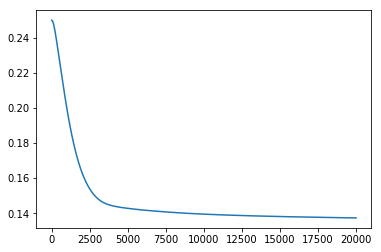

In [8]:
(X_train, y_train, X_val, y_val, X_test, y_test) = prepareRailwayData(scale = 1)
y_pred = multiClassLogisticRegression(X_test, X_train, y_train, 2, 20000,0.000001, 0.999)
print("Accuracy, Logistic Regression, Railway Data (Test)", accuracy(y_pred, y_test))
#0.761

Accuracy, Logistic Regression, Railway Data (Train) 0.8148487626031164


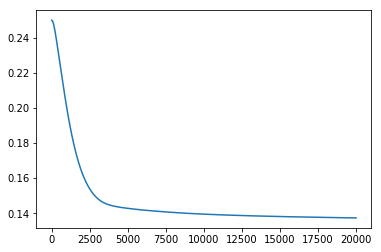

In [9]:
(X_train, y_train, X_val, y_val, X_test, y_test) = prepareRailwayData(scale = 1)
y_pred = multiClassLogisticRegression(X_train, X_train, y_train, 2, 20000,0.000001, 0.999)
print("Accuracy, Logistic Regression, Railway Data (Train)", accuracy(y_pred, y_train))
#0.799

In [10]:
def multiClassLogisticRegression(X_test, X_train, y_train, numClasses, numIterations = 2000, alpha = 0.001, beta = 0.9):
    old_y_train = y_train
    y_train = get_one_hot(y_train, numClasses)
    
#    X_train = np.hstack((np.array(np.ones((X_train.shape[0],1))),X_train))
#    X_test = np.hstack((np.array(np.ones((X_test.shape[0],1))),X_test))

    X_train = quadKernel(X_train)
    X_test = quadKernel(X_test)
    numFeatures = X_train.shape[1]
    W = np.random.rand(numFeatures, numClasses)/1000
    (W,J_hist, W_hist) = gradientDescentLogisticMultiClass(X_train, y_train, W, alpha = alpha, numIterations=numIterations, beta = beta, verbose = False)
    
    plt.plot(J_hist)
    
    y_pred = softmax(X_test,W)
    y_pred = np.argmax(y_pred, axis=1)
    
    return y_pred

Accuracy, Logistic Regression, Medical Data (Test) 0.8996666666666666


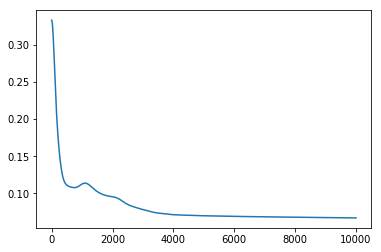

In [11]:
(X_train, y_train, X_val, y_val, X_test, y_test) = prepareMedicalData()
y_pred = multiClassLogisticRegression(X_test, X_train, y_train, 3, 10000, 0.00001, 0.999)
print("Accuracy, Logistic Regression, Medical Data (Test)", accuracy(y_pred, y_test))

# OneVsAll
- Have to train 3 classifiers
- Conflict --> Rejection Class

OneVsAll Logistic Regression, Only good points, Medical Data (Test) 0.8773873185637892
OneVsAll Logistic Regression, All points, Medical Data (Test) 0.8223333333333334


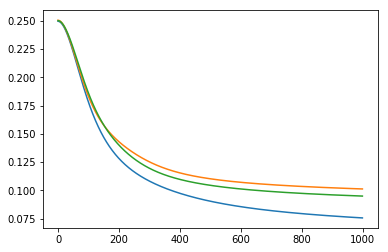

In [12]:
(X_train, y_train, X_val, y_val, X_test, y_test) = prepareMedicalData()
numClasses = 3
X_train = quadKernel(X_train)
X_test = quadKernel(X_test)
numFeatures = X_train.shape[1]
y_train = get_one_hot(y_train, numClasses)

y_pred = []
for index in range(numClasses):    
    y_train_index = np.array([y_train[:,index]]).T
    y_train_index = np.hstack(  (1 - y_train_index, y_train_index )  )
    #NotIndex, Index

    W = np.random.rand(numFeatures, 2)/1000
    (W, J_hist, W_hist) = gradientDescentLogisticMultiClass(X_train, y_train_index, W, alpha = 0.00001, numIterations=1000, beta = 0.99, verbose = False)
    plt.plot(J_hist)
    #W represents individual classifiers
    
    y_pred_index = softmax(X_test,W)
    y_pred_index = np.argmax(y_pred_index, axis=1)
    y_pred.append(y_pred_index)

y_pred = np.array(y_pred).T


legitIndices = np.where(np.sum(y_pred, axis = 1) ==1)[0]
rejectedIndices = np.where(np.sum(y_pred, axis = 1) != 1)[0]

print("OneVsAll Logistic Regression, Only good points, Medical Data (Test)", accuracy(y_pred[legitIndices].argmax(axis = 1), y_test[legitIndices]))
print("OneVsAll Logistic Regression, All points, Medical Data (Test)", accuracy(y_pred.argmax(axis = 1), y_test))

# Comments:
    - None, really
    - For some reason, One vs All method is worse than softmax even when accounting only for those points that are classified without collision
    - When accounting for collisions (which occur 382/3000 times), accuracy gets much worse

In [13]:
rejectedIndices.shape

(382,)

In [14]:

#This is worse than normal, even when only including legit indices

In [15]:
accuracy(y_pred.argmax(axis = 1), y_test)

0.8223333333333334

In [16]:
def perceptron(X_test, X_train, y_train):
    ## assumes class labels as 0 and 1
    numFeatures = X_train.shape[1]
    X_train = np.hstack((np.array(np.ones((X_train.shape[0],1))),X_train))
    X_test = np.hstack((np.array(np.ones((X_test.shape[0],1))),X_test))

    W = np.zeros(numFeatures+1)
    acc_test = []
    acc_train = []
    for idx in range(X_train.shape[0]):
        y = np.dot(X_train[idx], W)
        if(y > 0):
            y = 1
        else:
            y = 0
        W = W + 0.0001*(y_train[idx]-y)*X_train[idx].T
        acc_test.append(accuracy(y_test, np.dot(X_test, W) > 0))
        acc_train.append(accuracy(y_train, np.dot(X_train, W)> 0))
    y_pred = np.zeros(X_test.shape[0])
    plt.plot(acc_test, label='test')
    plt.plot(acc_train, label='train')
    plt.legend()
    for idx in range(X_test.shape[0]):
        y = np.dot(X_test[idx], W)
        if(y > 0):
            y_pred[idx] = 1
        else:
            y_pred[idx] = 0
            
    return y_pred

0.6605504587155964


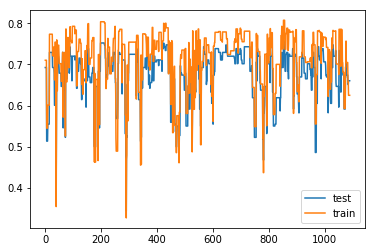

In [17]:
(X_train, y_train, X_val, y_val, X_test, y_test) = prepareRailwayData(scale = 1)
y_pred = perceptron(X_test, X_train, y_train)
print(accuracy(y_pred, y_test))

##### Train accuracy more volatile than test
##### Multiple y for same x, outliers -> one reason
##### Many points concentrated near the hyper plane. Hence one misclassification 

In [ ]:

cset = ax.scatter(X1[contour], X2[contour], X3[contour], extend3d=True, cmap=cm.coolwarm)

###  SVM

In [207]:
#CVXOPT optimizer
#https://courses.csail.mit.edu/6.867/wiki/images/a/a7/Qp-cvxopt.pdf
  
import cvxopt
from numpy import linalg


class SVM(object):
    
    def __init__(self, kernel = linear_kernel, C = None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)
    
    def fit(self, X, y):

        n_samples, n_features = X.shape
        
        K = np.zeros((n_samples, n_samples)) 
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])
        
        
        P = cvxopt.matrix(K * np.matmul(y.T,y)) 
        q = cvxopt.matrix(-1 * np.ones(n_samples))
        
        if self.C is not None:
            G = cvxopt.matrix(np.vstack( (-1*np.identity(n_samples), np.identity(n_samples))))
            h = cvxopt.matrix(np.vstack( (np.zeros((n_samples,1)), np.ones((n_samples,1))*self.C) ) )             
        else: 
            G = cvxopt.matrix(-1*np.identity(n_samples))
            h = cvxopt.matrix(np.zeros((n_samples,1)))
            
        print(A.shape)
        A = cvxopt.matrix(np.array([y]).astype(float)) 
        b = cvxopt.matrix(0.0)

        sol = cvxopt.solvers.qp(P,q,G,h,A,b)
        a = np.array(sol['x'])

        sv_index = np.where(a>1e-9)[0] 
        ind = np.arange(len(a))[sv_index]
        self.a = a[sv_index] 
        self.sv = X[sv_index] 
        self.sv_y = y[sv_index]
        

        #Find W,b
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n], sv_index])
        self.b /= len(self.a)
        
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None
          
        return a
    
    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) #+ self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))
    
    
    
   

In [312]:
#Default SVM
class SVM(object):

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples),'d')
        b = cvxopt.matrix(0.0)
        

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
        
        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print("%d support vectors out of %d points" % (len(self.a), n_samples))

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

        return a
        
    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))

def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x, y, sigma=1):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

def sigmoidal_kernel(x,y, a = 1, theta = 0):
    return np.tanh(a*np.dot(x,y) + theta)

In [319]:
(X_train, y_train, X_val, y_val, X_test, y_test) = prepareMedicalData()
#X_train = X_train[:1000,:]
#y_train = y_train[:1000]
#X_test = X_test[:400,:]
#y_test = y_test[:400]

clf = SVM(kernel = polynomial_kernel, C = 1)
y_train = (y_train==1)*2 - 1
y_test = (y_test==1)*2 - 1

a = clf.fit(X_train, y_train)
#print(a[a>1e-5])
y_pred = clf.predict(X_test)
print("Accuracy", accuracy(y_pred, y_test))
print("Precision", precision(y_pred, y_test, 1))
print("Recall", recall(y_pred, y_test, 1))

#Gaussian: .89, .87, .82
#Polynomial(3): .91, .87, .86
#Polynomial(2): .915, .84, .902
#Linear: .81, .74, .71

     pcost       dcost       gap    pres   dres
 0: -1.1188e+03 -7.5359e+03  5e+04  4e+00  1e-12
 1: -7.2885e+02 -5.1540e+03  7e+03  3e-01  1e-12
 2: -6.9245e+02 -3.5135e+03  4e+03  2e-01  9e-13
 3: -6.8393e+02 -3.0764e+03  4e+03  1e-01  9e-13
 4: -6.7109e+02 -2.9628e+03  3e+03  1e-01  9e-13
 5: -6.5200e+02 -2.8648e+03  3e+03  1e-01  8e-13
 6: -6.1660e+02 -2.4635e+03  3e+03  7e-02  8e-13
 7: -5.9666e+02 -2.3106e+03  3e+03  6e-02  9e-13
 8: -5.7866e+02 -1.9933e+03  2e+03  4e-02  9e-13
 9: -5.6345e+02 -1.7389e+03  2e+03  3e-02  9e-13
10: -5.4314e+02 -1.5254e+03  1e+03  2e-02  1e-12
11: -5.1738e+02 -1.2568e+03  1e+03  1e-02  1e-12
12: -5.0601e+02 -1.1155e+03  9e+02  9e-03  1e-12
13: -5.0164e+02 -8.7978e+02  5e+02  5e-03  1e-12
14: -5.0159e+02 -7.0556e+02  3e+02  2e-03  1e-12
15: -5.0827e+02 -6.3764e+02  2e+02  1e-03  1e-12
16: -5.1716e+02 -5.9038e+02  9e+01  5e-04  1e-12
17: -5.2260e+02 -5.6503e+02  5e+01  2e-04  1e-12
18: -5.2701e+02 -5.5037e+02  2e+01  5e-05  1e-12
19: -5.2990e+02 -5.43

In [ ]:
legitIndices = np.where(np.sum(y_pred==1, axis = 1) ==1)[0]
rejectedIndices = np.where(np.sum(y_pred==1, axis = 1) != 1)[0]

print("No. of legit indices = ", legitIndices.shape[0])
print("No. of rejected indices = ", rejectedIndices.shape[0])


print("OneVsAll SVM, Only good points, Medical Data (Test)", accuracy(y_pred[legitIndices].argmax(axis = 1), y_test[legitIndices]))
#.95
print("OneVsAll SVM, All points, Medical Data (Test)", accuracy(y_pred.argmax(axis = 1), y_test))
#.85

In [371]:
#One-vs-One

(X_train, y_train, X_val, y_val, X_test, y_test) = prepareMedicalData()
#X_train = X_train[:1000,:]
#y_train = y_train[:1000]
#X_test = X_test[:400,:]
#y_test = y_test[:400]


numClasses = 3
numFeatures = X_train.shape[1]
y_pred = []

print("Data Ready")

y_pred_oVo = np.zeros((numClasses, numClasses, X_test.shape[0]))
for i in range(numClasses):
    for j in range(i+1, numClasses):
        print("Class ", i, " vs ", j)
        #i-->1, j-->-1
        relevantIndices = np.logical_or((y_train == i),(y_train == j))
        clf = SVM(kernel = polynomial_kernel, C = 1)
        clf.fit(X_train[relevantIndices], (y_train[relevantIndices] == i)*2 - 1)

        y_pred_oVo[i,j,:] = clf.predict(X_test)
        y_pred_oVo[j,i,:] = - clf.predict(X_test)
        #y_pred[i][j] ==1 --> i beat j
            


Data Ready
Class  0  vs  1
     pcost       dcost       gap    pres   dres
 0: -3.9572e+02 -5.1273e+03  4e+04  4e+00  1e-12
 1: -2.4731e+02 -3.3781e+03  6e+03  4e-01  8e-13
 2: -2.2364e+02 -1.6282e+03  2e+03  1e-01  6e-13
 3: -2.1906e+02 -9.1812e+02  1e+03  6e-02  5e-13
 4: -2.0871e+02 -7.5077e+02  9e+02  4e-02  5e-13
 5: -2.0198e+02 -7.3757e+02  9e+02  4e-02  5e-13
 6: -1.8665e+02 -6.5573e+02  8e+02  3e-02  4e-13
 7: -1.7819e+02 -5.6460e+02  6e+02  2e-02  4e-13
 8: -1.6970e+02 -5.1299e+02  6e+02  2e-02  5e-13
 9: -1.6347e+02 -4.5094e+02  5e+02  1e-02  4e-13
10: -1.5853e+02 -3.4179e+02  3e+02  8e-03  5e-13
11: -1.5587e+02 -2.6944e+02  2e+02  4e-03  6e-13
12: -1.5490e+02 -2.1278e+02  9e+01  2e-03  7e-13
13: -1.5393e+02 -1.9122e+02  5e+01  8e-04  7e-13
14: -1.5504e+02 -1.7965e+02  3e+01  4e-04  8e-13
15: -1.5229e+02 -1.7712e+02  3e+01  2e-04  8e-13
16: -1.5327e+02 -1.7389e+02  2e+01  1e-04  7e-13
17: -1.5312e+02 -1.7322e+02  2e+01  9e-05  8e-13
18: -1.5578e+02 -1.6800e+02  1e+01  4e-05  

In [373]:
#legitIndices = (np.max(np.sum(y_pred_oVo, axis = 0), axis = 0) == numClasses - 1)
y_pred = np.argmax(np.sum(y_pred_oVo, axis = 1), axis = 0)
print("Accuracy", accuracy(y_pred, y_test))



Accuracy 0.8966666666666666


0.8975


In [368]:
y_test

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 2, 0, 2, 0,
       1, 2, 0, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1,
       0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2,
       2, 0, 1, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 2,
       2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 1, 1, 1, 1, 2,
       0, 1, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 1,
       2, 2, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 0, 1, 1, 0, 1,
       2, 1, 2, 0, 2, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 2, 1, 0, 0, 0, 0, 1,
       1, 0, 2, 1, 2, 0, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2,
       2, 2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 2, 1, 1, 0, 1, 0, 1, 2, 1, 2,
       2, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 1, 2, 1, 0, 2, 0, 2,
       2, 1, 0, 1, 2, 1, 2, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 2, 0, 0,
       0, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 0,

<IPython.core.display.Javascript object>


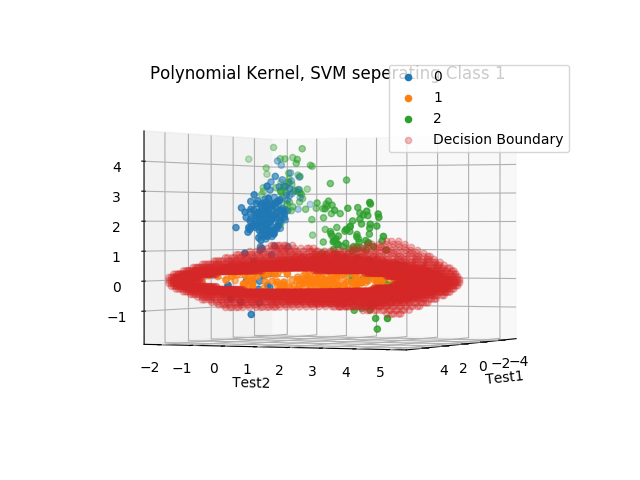

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:33: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a differe

In [322]:
%matplotlib notebook
(X_train, y_train, X_val, y_val, X_test, y_test) = prepareMedicalData()
X_train = X_train[:600,:]
y_train = y_train[:600]
X_test = X_train[:600,:]
y_test = y_test[:600]


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

for y in range(np.max(y_train)+1):
    X = X_train[np.where(y_train==y)[0]]
    ax.scatter(X[:,0], X[:,1], X[:,2], label = str(y))

#ax.scatter(clf.sv[:,0], clf.sv[:,1], clf.sv[:,2], s = 100, label = "Support Vectors")


plt.xlabel('Test1')
plt.ylabel('Test2')
#plt.zlabel('Test3')

plt.title('Polynomial Kernel, SVM seperating Class 1')


X1, X2, X3 = np.meshgrid(np.linspace(-5,5,50), np.linspace(-2,5,50), np.linspace(-1,4,50))
X = np.array([[x1, x2, x3] for x1, x2, x3 in zip(np.ravel(X1), np.ravel(X2), np.ravel(X3))])
Z = clf.project(X).reshape(X1.shape)
contour = [np.abs(Z)<=.2]
X = X1[contour]
Y = X2[contour]
Z = X3[contour]

surf = ax.scatter(X, Y, Z, alpha = 0.3, linewidth=1, label = 'Decision Boundary')

plt.legend()


In [ ]:
from matplotlib import cm

b = clf.b
w = clf.w

fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = (b - w[0]*X - w[1]*Y)/w[2]
surf = ax.plot_surface(X, Y, Z,
                       linewidth=0, antialiased=False)




In [327]:
(X_train, y_train, X_val, y_val, X_test, y_test) = prepareRailwayData(scale = 1)
clf = SVM(C = .1)
y_train = 2*y_train - 1
y_test = 2*y_test - 1
a = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy", accuracy(y_pred, y_test))
print("Recall", recall(y_pred, y_test, 1))
print("Precision", precision(y_pred, y_test, 1))

     pcost       dcost       gap    pres   dres
 0: -3.5780e+02 -2.6384e+02  1e+04  3e+01  2e-14
 1: -5.3842e+01 -2.5005e+02  5e+02  9e-01  2e-14
 2: -4.2807e+01 -1.0806e+02  7e+01  3e-02  4e-15
 3: -4.5622e+01 -5.7789e+01  1e+01  5e-03  4e-15
 4: -4.5996e+01 -4.7788e+01  2e+00  1e-14  4e-15
 5: -4.6253e+01 -4.6280e+01  3e-02  7e-15  3e-15
 6: -4.6256e+01 -4.6256e+01  3e-04  9e-16  3e-15
 7: -4.6256e+01 -4.6256e+01  3e-06  4e-15  3e-15
Optimal solution found.
1091 support vectors out of 1091 points
Accuracy 0.7247706422018348
Recall 0.7952755905511811
Precision 0.7481481481481481


# River Data Regression
    - Have to estimate y for each x, a regression Task
    
   ## Data
       - y vs x
       - Very clean scatter, no visible noise!!
       - Graph has 3 extremas and goes to infinite of small/large x
       - Might be generated using a 4th degree polynomial
    
   ## Ideas 
        - Linear Regression: Use a 4th degree polynomial Kernel
            - Optimize using gradient descent 
            - Solve using the Normal Formula
            - Find 4th degree Lagrange interpolating polynomial

In [ ]:
def prepareRiverData():
    riverData = pd.read_csv("updatedRiverData.csv")
    X = np.array([riverData.values[:,0]]).T
    y = riverData.values[:,1]
    
    n = X.shape[0]
    np.random.seed(42)
    indices = np.random.permutation(n)
    trainingIndex = indices[:int(5*n/6)]
    testIndex = indices[int(5*n/6):]

    X_train = X[trainingIndex]
    y_train = y[trainingIndex]
    X_test = X[testIndex]
    y_test = y[testIndex]
    
    return (X_train, y_train, X_test, y_test)

def gradientDescent(x, y, W, alpha = 0.0001, numIterations=1000000, tol = 1e-6, verbose = False, lam= 0, beta = 0):
    m = x.shape[0]
    print("No. of Training Samples ", m)
    J_hist = []
    v = np.zeros(W.shape)
    for i in range(0, numIterations):
        hypothesis = np.dot(x, W)
        loss = hypothesis - y
        cost = np.sum(loss ** 2) / (2 * m)
        J_hist.append(cost)            

        if(i>10 and np.abs(J_hist[i]-J_hist[i-5])<tol): break

        gradient = np.dot(x.transpose(), loss) / m #gradient
        v = beta*v + alpha*gradient
        W = W - v

        if(verbose): 
            print("Iteration %d | Cost: %f" % (i, cost))
            #print("Weights: ", W)
            #print("Gradient: ", gradient)
            #print("Momentum: ", v)
        

    return (W, J_hist)
    
def polynomialKernel(X, n):
    poly = np.hstack((np.ones(X.shape),X))
    for i in range(2,n+1):
        poly = np.hstack((poly, np.float_power(X,i)))
    return poly

def MSE(y_pred, y):
    m = y_pred.shape[0]
    loss = y_pred - y
    cost = np.sum(loss ** 2) / (2 * m)
    return cost
    
def MAE(y_pred, y):
    m = y_pred.shape[0]
    loss = y_pred - y
    cost = np.sum(np.abs(loss)) / (2 * m)
    return cost
    

### Data looks like Polynomial + Noise
- We can try to seperate the two components, and analyse in greater detail

In [ ]:
#4th degree polynomial fit
(X_train, y_train, X_test, y_test) = prepareRiverData()

e = 1
y_mean = [np.mean(y_train[np.where([abs(X_train-x)<=e])[1]]) for x in X_train.flatten()]
y_noises = [y_train[np.where([abs(X_train-x)<=e])[1]] - np.mean(y_train[np.where([abs(X_train-x)<=e])[1]]) for x in X_train.flatten()]
y_noise = y_train - y_mean

plt.scatter(X_train, y_train, label = 'Data')
plt.scatter(X_train, y_mean, label = 'Means')
plt.title("Data with approximated means")
plt.legend()


In [ ]:
fig = plt.hist(y_noises[1], color = 'blue', edgecolor = 'black', bins = int(10), histtype = 'stepfilled', density = True)
plt.show()
means = [np.mean(y_noises[i]) for i in range(len(y_noises))]
variances = [np.std(y_noises[i]) for i in range(len(y_noises))]
plt.scatter(X_train, means)
plt.scatter(X_train, variances )


# Noise
    - The individual noise elements corresponding to each x are also normals, with approximately the same standard deviation (around 5).
    - A logical extension would be the assumption that the noise is independent of x, and by doing so, we can find a common sigma for the general noise

In [ ]:
fig = plt.hist(y_noise, color = 'blue', edgecolor = 'black', bins = int(100), histtype = 'stepfilled', density = True)
print("Noise has variance = ", np.var(y_noise))

In [ ]:
fig = plt.hist(y_noise, color = 'blue', edgecolor = 'black', bins = int(100), histtype = 'stepfilled', density = True)
print("Mean is ", np.mean(y_noise))
print("Mean is ", np.mean(y_noise))

# Gradient Descent
    - Progressively try polynomial kernels (linear, quad, tri, tetra)
    - Instead of random initialization, use weight n'th polynomial as initialization for n+1'th polynomial
 

In [ ]:
(X_train, y_train, X_test, y_test) = prepareRiverData()
X_train_linear = polynomialKernel(X_train,1)

W  = np.zeros(X_train_linear.shape[1], dtype = float)
(W1,J_hist) = gradientDescent(X_train_linear, y_train, W, alpha=0.0001, numIterations=10000, beta=0.95, tol = 1e-4)

In [ ]:
y_pred = np.dot(W1, X_train_linear.T)
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_pred)



In [ ]:
(X_train, y_train, X_test, y_test) = prepareRiverData()
X_train_quad = polynomialKernel(X_train,2)

W1 = np.hstack((W1,0))
(W2,J_hist) = gradientDescent(X_train_quad, y_train, W1, alpha=0.00000001, numIterations=10000, beta=0.999, tol = 1e-10, verbose = False)

In [ ]:
y_pred = np.dot(W2, X_train_quad.T)

plt.scatter(X_train, y_train)
plt.scatter(X_train, y_pred)
plt.grid(True)

In [ ]:
(X_train, y_train, X_test, y_test) = prepareRiverData()
X_train_tri = polynomialKernel(X_train,3)

W2 = np.hstack((W2,0))
(W3,J_hist) = gradientDescent(X_train_tri, y_train, W2, alpha=0.000000000007, numIterations=10000, beta=0.9977, tol = 1e-10, verbose = False)

In [ ]:
y_pred = np.dot(W3, X_train_tri.T)

plt.scatter(X_train, y_train)
plt.scatter(X_train, y_pred)
plt.grid(True)

#Stuck in a local optima

In [ ]:
(X_train, y_train, X_test, y_test) = prepareRiverData()
X_train_tetra = polynomialKernel(X_train,4)

W3 = np.hstack((W3,0))
(W4,J_hist) = gradientDescent(X_train_tetra, y_train, W3, alpha=0.0000000000000007, numIterations=10000, beta=0.99, tol = 1e-10, verbose = False)

In [ ]:
y_pred = np.dot(W4, X_train_tetra.T)
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_pred)




### Gradient Descent Fails
    - Gradient descent gets stuck at local optima when trained this way
    - Need ways to get around this. Thinking still.

### Lagrange Interpolation
    - Fit a 4th degree polynomial on data
    - How to choose 5 good points?
    - Try fitting higher degree polynomial just in case
    

In [ ]:
#4th degree polynomial fit
(X_train, y_train, X_test, y_test) = prepareRiverData()
xList = [0,25,50,75,100]
e = 0.5


yList = [np.mean(y_train[np.where([abs(X_train-x)<=e])[1]]) for x in xList]

from scipy.interpolate import lagrange
poly = lagrange(xList,yList)
W_lagrange = np.flip(poly.c)


X_train_tetra = polynomialKernel(X_train,4)
y_pred = np.dot(W_lagrange, X_train_tetra.T)
plt.scatter(X_train, y_train, alpha = 1, marker= ',', label = 'Given Data')
plt.scatter(X_train, y_pred, alpha = 1, marker = '.', label = 'Lagrange Interpolation Polynomial')
plt.title('Lagrange Interpolation on River Data')
plt.legend()
plt.xlabel('Distance (in Metres)')
plt.ylabel('Oxygen Levels (in Kg/m3)')
plt.grid(True)


#TEST
X_test_tetra = polynomialKernel(X_test, 4)
y_pred = np.dot(W_lagrange, X_test_tetra.T)
print("Mean Squared Error on Test Data = ", MSE(y_pred, y_test))
print("Mean Absolute Error on Test Data = ", MAE(y_pred, y_test))
print("Weights are ", W_lagrange)


# Gradient Descent Graphing
    - Can show presence of local optima by starting optimizations randomly, and looking at convergence to different losses


In [ ]:
(X_train, y_train, X_test, y_test) = prepareRiverData()
X_train_quad = polynomialKernel(X_train,2)

W1a = W1
(W2a,J_hist1) = gradientDescent(X_train_quad, y_train, W1a, alpha=0.00000001, numIterations=20000, beta=0.999, tol = 1e-10, verbose = False)

W1b = np.zeros(W1.shape)
(W2b,J_hist2) = gradientDescent(X_train_quad, y_train, W1b, alpha=0.00000001, numIterations=20000, beta=0.999, tol = 1e-10, verbose = False)

W1c = W1/2
(W2c,J_hist3) = gradientDescent(X_train_quad, y_train, W1c, alpha=0.00000001, numIterations=20000, beta=0.999, tol = 1e-10, verbose = False)

W1d = W1/3
(W2d,J_hist4) = gradientDescent(X_train_quad, y_train, W1d, alpha=0.00000001, numIterations=20000, beta=0.999, tol = 1e-10, verbose = False)

W1e = W1/4
(W2e,J_hist5) = gradientDescent(X_train_quad, y_train, W1e, alpha=0.00000001, numIterations=20000, beta=0.999, tol = 1e-10, verbose = False)

W1f = -W1/5
(W2f,J_hist6) = gradientDescent(X_train_quad, y_train, W1f, alpha=0.00000001, numIterations=20000, beta=0.999, tol = 1e-10, verbose = False)

W1g = W1*-1
(W2g,J_hist7) = gradientDescent(X_train_quad, y_train, W1g, alpha=0.00000001, numIterations=20000, beta=0.999, tol = 1e-10, verbose = False)



In [ ]:
plt.plot(J_hist1, label = '1st Initilization')
plt.plot(J_hist2, label = '2nd Initialization')
plt.plot(J_hist3, label = '3rd Initialization')
plt.plot(J_hist4, label = '4th Initialization')
plt.plot(J_hist5, label = '5th Initialization')
plt.plot(J_hist6, label = '6th Initialization')
plt.plot(J_hist7, label = '7th Initialization')
plt.title('Gradient Descent on different initializations')
plt.xlabel('Iterations')
plt.ylabel('MSE loss')
plt.legend()
plt.yscale('log')



# Normal Formula

In [ ]:
(X_train, y_train, X_test, y_test) = prepareRiverData()
X_train_tetra = polynomialKernel(X_train,4)
X_test_tetra = polynomialKernel(X_test,4)

W_normal = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train_tetra.T, X_train_tetra)),X_train_tetra.T), y_train)

y_pred = np.dot(W_normal, X_test_tetra.T)
print("Mean Squared Error (Test) on applying Normal Formula: ", MSE(y_pred, y_test))
print("Mean Absolute Error (Test) on applying Normal Formula: ", MAE(y_pred, y_test))
print("Weights are ", W_normal)


In [ ]:

plt.scatter(X_train, y_train, alpha = 1, marker= ',', label = 'Given Data')
plt.scatter(X_train, np.dot(W_normal, X_train_tetra.T), alpha = 1, marker = '.', label = 'Normal Formula found Polynomial')
plt.scatter(X_train, np.dot(W_lagrange, X_train_tetra.T), alpha = 1, marker = '.', label = 'Lagrange Interpolation Polynomial')
plt.title('Normal Formula to solve OLS on River Data')
plt.legend()
plt.xlabel('Distance (in Metres)')
plt.ylabel('Oxygen Levels (in Kg/m3)')

